In [87]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [88]:
x = np.linspace(0, 50, 51)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [89]:
y = x + 10 * np.random.random((len(x)))
y

array([ 7.46747042,  8.81782384,  8.95084274, 12.1635149 ,  5.91618015,
       14.24647511, 13.71890443, 14.74921522, 10.71703307, 16.49240103,
       17.73260004, 15.81889665, 16.94440161, 21.35902828, 19.10563456,
       16.16254221, 22.19254963, 24.97971721, 27.77639925, 19.40920321,
       24.92815727, 30.43015208, 23.65302677, 28.83674419, 25.35751139,
       31.70330829, 33.38176569, 32.88123213, 32.81534561, 32.95695312,
       30.96152795, 31.90406035, 41.15449079, 40.32259183, 40.95354891,
       42.29321959, 42.28127956, 40.82977757, 39.62486213, 47.58846934,
       47.2858852 , 46.26105586, 46.23830199, 43.86246149, 48.51659858,
       48.36176325, 48.38882657, 48.93496356, 51.97743955, 55.66829348,
       59.99761003])

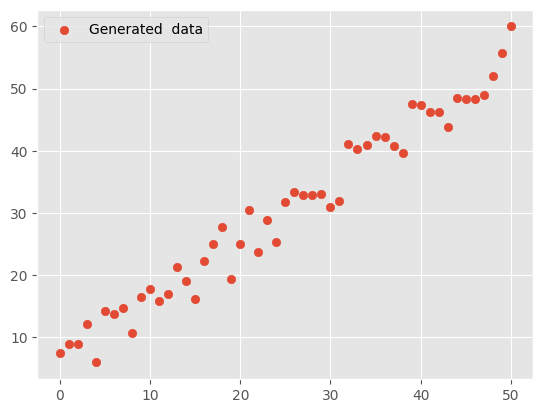

In [90]:
plt.scatter(x, y, label='Generated  data')
plt.legend()
plt.show()

In [91]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [92]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [93]:
trained_model = model.fit(x, y, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 5022.5503
Epoch 2/200
2/2 [==============================] - 0s 1ms/step - loss: 4199.1763
Epoch 3/200
2/2 [==============================] - 0s 985us/step - loss: 3452.7788
Epoch 4/200
2/2 [==============================] - 0s 1ms/step - loss: 2807.1375
Epoch 5/200
2/2 [==============================] - 0s 1ms/step - loss: 2214.4805
Epoch 6/200
2/2 [==============================] - 0s 2ms/step - loss: 1722.3119
Epoch 7/200
2/2 [==============================] - 0s 2ms/step - loss: 1303.4158
Epoch 8/200
2/2 [==============================] - 0s 1ms/step - loss: 946.8143
Epoch 9/200
2/2 [==============================] - 0s 1ms/step - loss: 664.2831
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 439.6459
Epoch 11/200
2/2 [==============================] - 0s 2ms/step - loss: 274.6432
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 158.0000
Epoch 13/200
2/2 [==========

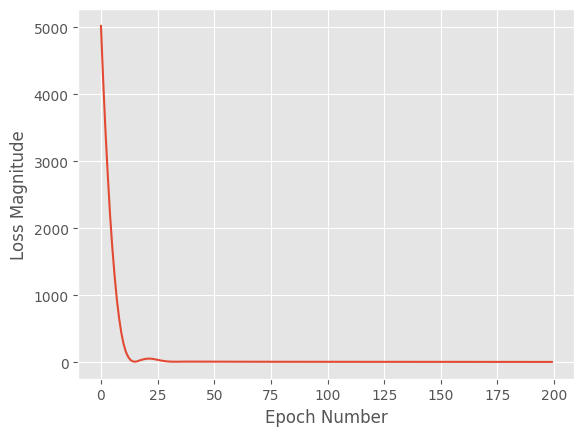

In [94]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(trained_model.history['loss'])
plt.show()

In [95]:
y_pred_model = model.predict(x)

2/2 [==============================] - 0s 894us/step


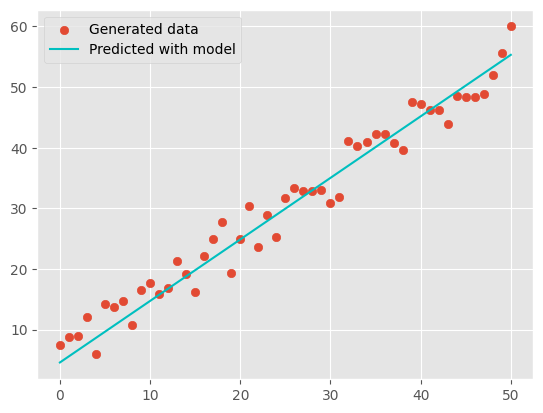

In [96]:
plt.scatter(x, y, label='Generated data')
plt.plot(x, y_pred_model, label='Predicted with model', color='c')
plt.legend()
plt.show()

In [97]:
layer = model.get_layer(index=0)
layer

In [98]:
weights = layer.get_weights()
weights

[array([[1.0147661]], dtype=float32), array([4.581211], dtype=float32)]

In [99]:
m, b = weights[0][0], weights[1]
print(m)
print(b)

[1.0147661]
[4.581211]


In [100]:
[1.014319]
[4.2396894]

[4.2396894]

In [101]:
y_pred_params = m * x + b
y_pred_params

array([ 4.58121109,  5.59597719,  6.61074328,  7.62550938,  8.64027548,
        9.65504158, 10.66980767, 11.68457377, 12.69933987, 13.71410596,
       14.72887206, 15.74363816, 16.75840425, 17.77317035, 18.78793645,
       19.80270255, 20.81746864, 21.83223474, 22.84700084, 23.86176693,
       24.87653303, 25.89129913, 26.90606523, 27.92083132, 28.93559742,
       29.95036352, 30.96512961, 31.97989571, 32.99466181, 34.00942791,
       35.024194  , 36.0389601 , 37.0537262 , 38.06849229, 39.08325839,
       40.09802449, 41.11279058, 42.12755668, 43.14232278, 44.15708888,
       45.17185497, 46.18662107, 47.20138717, 48.21615326, 49.23091936,
       50.24568546, 51.26045156, 52.27521765, 53.28998375, 54.30474985,
       55.31951594])

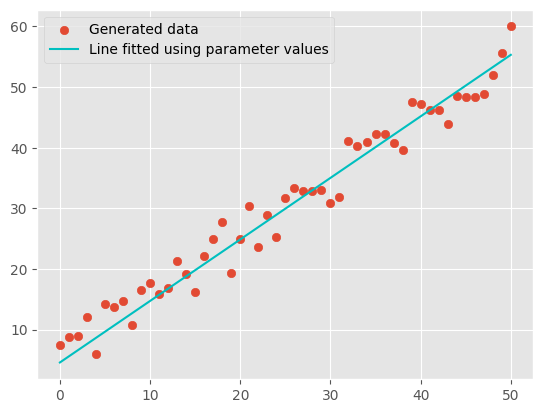

In [102]:
plt.scatter(x, y, label='Generated data')
plt.plot(x, y_pred_params, label='Line fitted using parameter values', color='c')
plt.legend()
plt.show()